In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
board_size=(4,4)

In [4]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]
    
    return arr

In [5]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


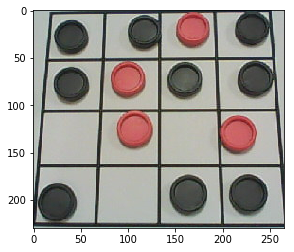

In [10]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


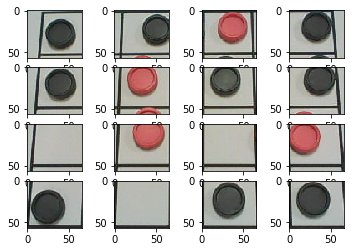

In [17]:
fname='robot images/test9.jpg'
count=0
arr=read_image(fname)
for r in range(4):
    for c in range(4):
        subplot(4,4,count+1)
        small_square=get_square(arr,board_size[0],board_size[1],r,c,100)
        
        
        imshow(small_square)
        
        imsave('piece%d.jpg' % count,small_square)
        count+=1


In [12]:
for count in range(10):
    print('piece%d.jpg' % count)

piece0.jpg
piece1.jpg
piece2.jpg
piece3.jpg
piece4.jpg
piece5.jpg
piece6.jpg
piece7.jpg
piece8.jpg
piece9.jpg
